In [10]:
import NX5352
import pickle
import os
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

p = NX5352.NX5352("data")

(array([144078.,      0.,  16026.,      0.,      0.,   2695.,      0.,
           694.,      0.,    398.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

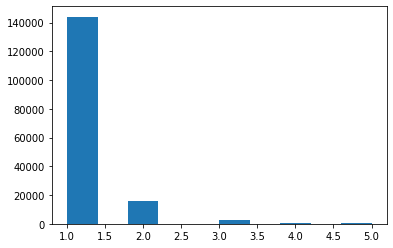

In [2]:
d_u, d_u_count = p.get_domains_per_user()
plt.hist(list(d_u_count.values()))

(array([89056.,     0.,  7135.,     0.,     0., 66945.,     0., 17008.,
            0.,  8837.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

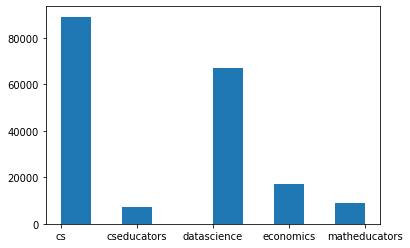

In [3]:
u_d = p.get_users_per_domain()
k, v = list(u_d.keys()), list(u_d.values())
plt.hist(k, weights=v)

In [4]:
u_map = p.get_user_map()
elist, nlist = p.get_user_domain_participation_edgelist(u_map, d_u_count)

In [5]:
G = nx.Graph()
G.add_edges_from(elist)
nx.write_gml(G, "demograph.gml")

In [6]:
pos = nx.spring_layout(G)

{'cs': Text(-0.12227658927440643, -0.24419079720973969, 'cs'),
 'cseducators': Text(0.6213856339454651, -0.2173740714788437, 'cseducators'),
 'datascience': Text(-0.26488739252090454, 0.4019782245159149, 'datascience'),
 'economics': Text(0.4446163475513458, 0.2196202427148819, 'economics'),
 'matheducators': Text(0.5273562073707581, -0.4147380292415619, 'matheducators')}

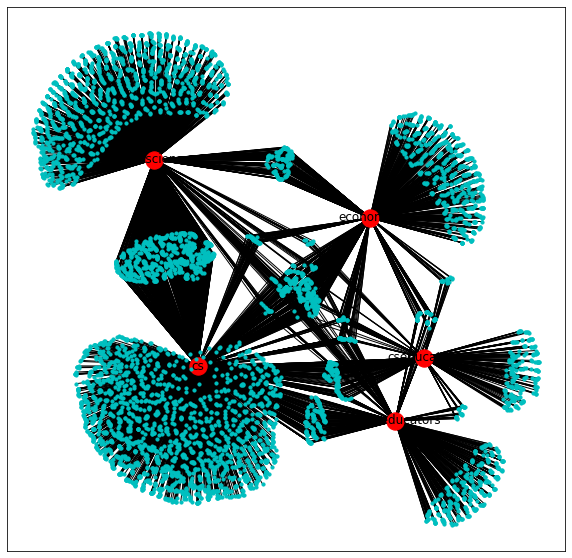

In [7]:
plt.figure(figsize = (10, 10))
nx.draw_networkx_nodes(G, pos = pos, nodelist = nlist[0], node_color = "r")
nx.draw_networkx_nodes(G, pos = pos, nodelist = nlist[1], node_color = "c", node_size = 10)
nx.draw_networkx_edges(G, pos = pos)
nx.draw_networkx_labels(G, pos = pos, labels = {i: i for i in nlist[0]})

In [8]:
# prepare for SBM

# need to hash the nodes to substitute in edges
node_hash = {}
nlist_sorted = list(nlist[1])
sorted(nlist_sorted)

j = 0
for i in nlist_sorted + nlist[0]:
    node_hash[i] = j
    j += 1

augmented_nodelist = [node_hash[i] for i in nlist_sorted + nlist[0]]

# use the hashed nodes for edgelist
augmented_edgelist = []

for i in elist:
    augmented_edgelist.append((node_hash[i[0]], node_hash[i[1]]))

In [17]:
with open("hashed.edgelist", "w") as fp:
    for i in augmented_edgelist:
        fp.write("{}\t{}\n".format(i[0], i[1]))


In [12]:
with open("nodehash", "wb") as fp:
    pickle.dump(node_hash, fp)

In [13]:
nlist[0]

['cs', 'cseducators', 'datascience', 'economics', 'matheducators']

In [16]:
augmented_nodelist[-5:]

[6156, 6157, 6158, 6159, 6160]